In [1]:
NAME = "LEONARDO PASSOS FIDA"
COLLABORATORS = ""

# Titanic dataset: survival rate analysis

In [2]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# READING THE CSV FILE
titanic=pd.read_csv('train.csv')

In [4]:
# READING THE HEAD OF THE DATA FRAME TO UNDERSTAND THE COLUMNS AND CATEGORIES
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# FINDING OUT HOW MUCH DATA WE HAVE IN THE DATA FRAME
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the .info() method shown above, we can see that the "Age" category has null values, along with the "Cabin" feature.

In [6]:
# GETTING THE STATISTICAL SUMMARY OF THE DATA
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Since the non-numeric columns are ommited from the .describe() method, we can get a summary of the non-numeric data using the following method:

In [7]:
categorical = titanic.dtypes[titanic.dtypes == "object"].index
print(categorical)
titanic[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mannion, Miss. Margareth",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


First thing to do to clean up the data: finding out if we need all of the variables. Since 'PassengerId' is just a number assigned to each passenger, much like a serial variable in SQL, it is nothing more than an arbitrary identifier, so we can remove it from the data frame.

In [8]:
titanic.drop(['PassengerId'],axis=1,inplace=True)

Checking the head of the data frame again:

In [9]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The variable 'Survived' definitely must be kept, because it indicates if each passenger lived or died in the tragedy. The main goal is to predict survival. Other variables that are numerical could be useful for predicting survival, such as Pclass, Age, SibSp, Parch, Fare and Embarked, so let's keep all of them for now. There are 3 other variables to consider: Name, Ticket and Cabin. The variable "Name" is a character string of the name of each passenger. Let's analyze the first 15 rows of this column:

In [10]:
titanic['Name'].sort_values()[0:15]

845                               Abbing, Mr. Anthony
746                       Abbott, Mr. Rossmore Edward
279                  Abbott, Mrs. Stanton (Rosa Hunt)
308                               Abelson, Mr. Samuel
874             Abelson, Mrs. Samuel (Hannah Wizosky)
365                    Adahl, Mr. Mauritz Nils Martin
401                                   Adams, Mr. John
40     Ahlin, Mrs. Johan (Johanna Persdotter Larsson)
855                        Aks, Mrs. Sam (Leah Rosen)
207                       Albimona, Mr. Nassef Cassem
810                            Alexander, Mr. William
840                       Alhomaki, Mr. Ilmari Rudolf
210                                    Ali, Mr. Ahmed
784                                  Ali, Mr. William
730                     Allen, Miss. Elisabeth Walton
Name: Name, dtype: object

Checking the properties of the "Name" column:

In [11]:
titanic['Name'].describe()

count                          891
unique                         891
top       Mannion, Miss. Margareth
freq                             1
Name: Name, dtype: object

The variable Name has 891 unique values,  which is the same as the count of the column. Hence, we know that each name is unique. Married women have their maiden names listed in parentheses. It would be possible to extract last names in an effort to group family members together, but the number of categories would be very large, since there are a lot of people in this column. Additionally, the "Parch" and "SibSp" variables already show us some info about family relationships, so theoretically the variable "Name" could be removed. Nevertheless, since each name is unique, it would be a good idea, from a historical perspective, to keep this variable.

Doing the same procedure with the variable "Ticket":

In [12]:
titanic['Ticket'][0:15]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [13]:
titanic['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

The variable "Ticket" has 681 unique values, while the count in this column is 891. The number of unique tickets is not close to the number of passengers, and the ticket numbers do not appear to follow any pattern we could use for grouping people. Hence, this variable can be removed:

In [14]:
titanic.drop(['Ticket'],axis=1,inplace=True)

Checking the head of the data frame again:

In [15]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Now let's consider the "Cabin" variable. Checking the first 15 rows of this column:

In [16]:
titanic['Cabin'][0:15]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [17]:
titanic['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

This column has 147 unique values and the names of the levels for each cabin seem to follow a certain pattern: each starts with a capital letter followed by a number. This structure can be useful to make categories that might be significant for prediction, so this variable can be kept.

The next logical step is to think about transforming any variables. The variable "Survived" is an integer that has only 2 unique values: 0 if a passenger did not survive and 1 if a passenger survived. This is what we call a dummy variable, because 0 indicates absence and 1 represents presence. We could encode this variable as a categorical variable:

In [18]:
survived = pd.Categorical(titanic["Survived"])
survived = survived.rename_categories(["Died","Survived"])              
survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


Now, this categorical variable shows appropriate category names. Nevertheless, the variable "Survived" already is well organized in terms of a dummy variable, because we are only interested to extract the information about whether a passenger has survived or not from this variable. Hence, we are not going to change it.

Another variable that can be revisited is "Pclass". It is an integer which has 3 unique values: 1, 2 and 3, which represents first class, second class and third class, respectively. Since the passenger class represents a category, it does not make much sense to keep it as a numeric value. Additionally, class number 1 would be higher than class number 2, which will be higher than class number 3. Nevertheless, when this variable is encoded as only numeric, 1 comes before 2. We can quickly solve this by making a categorical variable:

In [19]:
Pclass = pd.Categorical(titanic["Pclass"],ordered=True)
Pclass = Pclass.rename_categories(["Class 1","Class 2","Class 3"])              
Pclass.describe()

,counts,freqs
categories,,
Class 1,216,0.242424
Class 2,184,0.206510
Class 3,491,0.551066


Now, we can include this variable in the original data frame:

In [20]:
titanic['Pclass']=Pclass

Checking the head of the data frame to see the chages made so far:

In [21]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,Class 3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,Class 1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,Class 3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,Class 1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,Class 3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


We can now focus on the "Cabin" variable. Each cabin appears to be a section of the ship indicated by the capital letter that initiates each value on this column. We can check the unique values:

In [22]:
titanic["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We can now extract the first letter of each cabin, in order to reduce the number of levels and check the amount of each category of letters for the cabins:

In [23]:
cabin_letters=titanic['Cabin'].astype(str)
cabin_cat=np.array([cabin[0] for cabin in cabin_letters])
cabin_cat=pd.Categorical(cabin_cat)
cabin_cat.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


The last output shows the "Cabin" variable condensed into broader categories, which is the letter that represents the location on the ship. Moreover, we can see that 687 passengers did not have a cabin listed, because it comes from the "NaN" values. This represents more than 65% of all the passengers. With so many missing values in this category, perhaps this variable does not contain much useful information. Nevertheless, a passenger with his or her cabin missing could mean that he or she died. Hence, let's keep this new categorized variable in the data frame.

In [24]:
titanic["Cabin"]=cabin_cat

Checking the head of the data frame once more:

In [25]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,Class 3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,1,Class 1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,Class 3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,1,Class 1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,Class 3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S


The next important step is to analyze whether there are missing values and outliers. The first column that we are going to analyze is the "Age" variable:

In [26]:
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

If we remember from above, the number of passengers listed in this data frame was 891, but we only have 714 ages listed in the data frame. This is a clear sign that we have missing values. We can find out which rows contain missing values in the "Age" category with the numpy function np.where():

In [27]:
missing_age = np.where(titanic["Age"].isnull()==True)
missing_age

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

We can also find out the quantity of missing values in this category:

In [28]:
len(missing_age[0])

177

Since the number of passengers is almost 900 in the data frame and we have 177 missing values for the age, it would probably not be a good idea to delete passengers' age altogether. We could replace the missing values with zeros, or with a statistical value such as the mean or median.

The option of replacing the missing values with zeros is not a good one for our case, since a person's age cannot be 0. A simple fix like setting the missing values of age to be equal to some central value is interesting, but first we have to check the distribution of ages in the data frame. So, let's create a histogram of the passengers' ages:

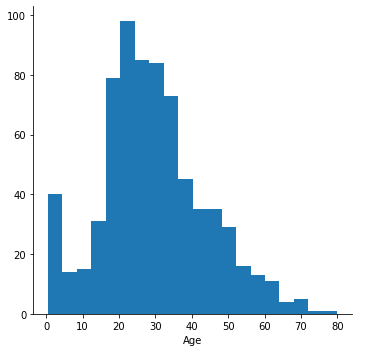

In [29]:
grid=sns.FacetGrid(titanic,height=5)
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

From the histogram, we can see that the most common ages are between 20 and 30. Hence,  we could fill in the missing ages with a central value between 20 and 30, such as 27:

In [30]:
age_fill=np.where(titanic["Age"].isnull(),27,titanic["Age"])
titanic["Age"]=age_fill
titanic["Age"].describe()

count    891.000000
mean      29.162929
std       13.046587
min        0.420000
25%       22.000000
50%       27.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

We can check the same histogram again, since a considerable amount of values of 27 were added to the column:

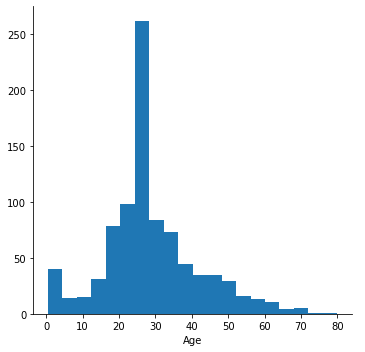

In [31]:
grid=sns.FacetGrid(titanic,height=5)
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

We can see now that the age distribution it is more centered between 20 and 30. It is definitely a better option than throwing entire records away of the passengers' ages.

We can also make the same missing value analysis on the "Embarked" column:

In [32]:
titanic[titanic['Embarked'].isnull()==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,Class 1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B,NaN
829,1,Class 1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B,NaN


From the table above, there are two entries in the DataFrame in which the passenger's port of entry in the ship was not listed. This is a considerably small number of missing values. Hence, we could fill these missing values with some center measure, such as the mode (most common value in the "Embarked" category in the dataset):

In [33]:
titanic['Embarked'].mode()[0]

'S'

It looks like "S" is the most common port of entry. Therefore, we can replace the NaN values in the "Embarked" category with "S":

In [34]:
titanic['Embarked']=titanic['Embarked'].fillna('S')

Rechecking the dataset to see if we still have null values in the "Embarked" column:

In [35]:
titanic[titanic['Embarked'].isnull()==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


The missing values in the "Embarked" category were dealt with accordingly.

We can now move on to outliers in the passengers' age distribution. If we analyze the previous histogram, we can see that a couple of passengers were very close to the age 80, which is very uncommon for this data set. However, we can observe that the majority of the values are centered around the mean, which is between 20 and 30. A box plot can be constructed for the "Age" category:

<AxesSubplot:>

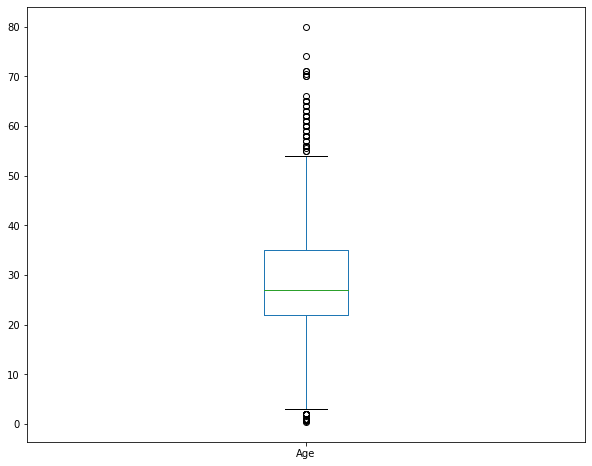

In [36]:
plt.figure(figsize=(10,8))
titanic['Age'].plot(kind='box')

We can see from the plot above that there are a few outliers in the "Age" category. They are mostly represented by the infants (age very close to 0) and the people whose ages are above the midpoint between 50 and 60. The majority of the data lies in the region between 5 and 55.

Looking at the "Fare" variable, we can also investigate for outliers, by using a box plot:

<AxesSubplot:>

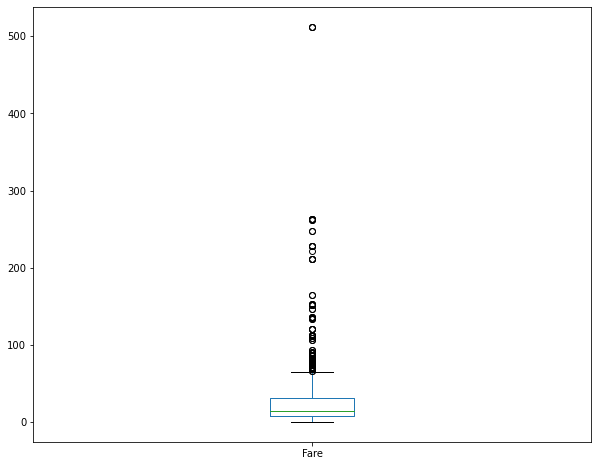

In [37]:
plt.figure(figsize=(10,8))
titanic['Fare'].plot(kind='box')

As we can clearly see from the box plot above, we have some outliers that are so far away from the whiskers that the box appears to be very small in the plot. This indicates that there are some passengers who paid fares that are much higher than the vast majority of the other passengers. We can investigate who are the people that paid such high fares:

In [38]:
location=np.where(titanic["Fare"]==max(titanic["Fare"]))
titanic.loc[location]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class 1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,1,Class 1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,1,Class 1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


Even though the box plot shows one passenger who paid more than all of the others, we can see, from the table above, that there were actually 3 passengers who paid a high fare. Since there are only 3 highrollers, we can leave the variable "Fare" unchanged.

Finally, we can discuss the need or not to create new variables. We can create a new variable called "Family", which combines the variables "Parch" and "SibSp", which can be used to indicate the total number of family members that a passenger brought to the Titanic, including siblings, parents, children and spouses:

In [39]:
titanic["Family"]=titanic["SibSp"]+titanic["Parch"]

Checking the head of the data frame again:

In [40]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,Class 3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S,1
1,1,Class 1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,1
2,1,Class 3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S,0
3,1,Class 1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,1
4,0,Class 3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S,0


We can also find out the people who had the most amount of family members on board:

In [41]:
titanic_most_family=np.where(titanic["Family"]==max(titanic["Family"]))
titanic.loc[titanic_most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,Class 3,"Sage, Master. Thomas Henry",male,27.0,8,2,69.55,n,S,10
180,0,Class 3,"Sage, Miss. Constance Gladys",female,27.0,8,2,69.55,n,S,10
201,0,Class 3,"Sage, Mr. Frederick",male,27.0,8,2,69.55,n,S,10
324,0,Class 3,"Sage, Mr. George John Jr",male,27.0,8,2,69.55,n,S,10
792,0,Class 3,"Sage, Miss. Stella Anna",female,27.0,8,2,69.55,n,S,10
846,0,Class 3,"Sage, Mr. Douglas Bullen",male,27.0,8,2,69.55,n,S,10
863,0,Class 3,"Sage, Miss. Dorothy Edith ""Dolly""",female,27.0,8,2,69.55,n,S,10


As we can see from the table above, 7 people on board of the Titanic had 8 siblings or spouses and 2 parents or children.

Another category we can create regards the passengers who were alone on the ship (Family value of 0) and the ones who were accompanied by other people (Family value greater than 0). We can call this new category "IsAlone":

In [42]:
titanic['IsAlone']=titanic['Family'].apply(lambda x: 1 if x==0 else 0)

Checking the head of the DataFrame with this new variable:

In [43]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,IsAlone
0,0,Class 3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S,1,0
1,1,Class 1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,1,0
2,1,Class 3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S,0,1
3,1,Class 1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,1,0
4,0,Class 3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S,0,1


At this step, we can finally answer the questions. In order to answer question number 1, about what categories of passengers were most likely to survive the Titanic disaster, we can consider the categories "Sex", "Pclass", "Family", "Age", "Cabin", "Embarked" and "IsAlone" in terms of survival rate.

First, let's start with the class of passengers in order to see which class the majority of the passengers who survived belonged to:

In [44]:
titanic.groupby('Pclass').sum()['Survived']

Pclass
Class 1    136
Class 2     87
Class 3    119
Name: Survived, dtype: int64

We can see that the majority of the people who survived belonged to Class 1. However, according to the original data frame, we know that there were many more people on board of the Titanic who belonged to Class 3 rather than Class 1. Hence, we can calculate the survival rate of the passengers in each class by dividing the amount of people who survived in that class by the total amount of passengers in that specific class:

In [45]:
titanic.groupby('Pclass').sum()['Survived']/titanic.groupby('Pclass').count()['Survived']

Pclass
Class 1    0.629630
Class 2    0.472826
Class 3    0.242363
Name: Survived, dtype: float64

We can observe that the highest survival rate is in Class 1, while the worst survival rate is in Class 3.

Now, let's move on to the "Sex" category:

In [46]:
titanic.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

In [47]:
titanic.groupby('Sex').count()['Survived']

Sex
female    314
male      577
Name: Survived, dtype: int64

Calculating the survival rate of men and women on board of the Titanic:

In [48]:
titanic.groupby('Sex').sum()['Survived']/titanic.groupby('Sex').count()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

We can observe that the highest survival rate is within females, while the worst survival rate is within males. This is expected, since the general policy in disasters is to save women and children first.

Now, let's move on to the "Family" category:

In [49]:
titanic.groupby('Family').sum()['Survived']

Family
0     163
1      89
2      59
3      21
4       3
5       3
6       4
7       0
10      0
Name: Survived, dtype: int64

In [50]:
titanic.groupby('Family').count()['Survived']

Family
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Survived, dtype: int64

Calculating the survival rate in terms of family size on board of the Titanic:

In [51]:
titanic.groupby('Family').sum()['Survived']/titanic.groupby('Family').count()['Survived']

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

We can observe that the highest survival rate is within families whose size corresponds to a total of 3 people, while the worst survival rate is within families with 7 or 10 people on board.

Additionally, we can perform the same survival rate determination on the "IsAlone" variable, in order to obtain a more broad idea about the survival among people who were alone and the ones who were not:

In [52]:
titanic.groupby('IsAlone').sum()['Survived']/titanic.groupby('IsAlone').count()['Survived']

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

We can see from the table above that a higher survival rate is observed among the people who were accompanied by at least one person, whereas a lower survival rate is observed among the people who were alone. This result is also expected, since it is likely that the people who were not alone and also survived the Titanic disaster probably went to a life boat accompanying his or her spouse, or children. The people who were alone, especially men, were less likely to survive, because probably they were not given priority on the life boats.

The survival rate can also be determined among the "Cabin" category. Ignoring the missing values (values marked with an "n") on the column, we can perform the following:

In [53]:
by_cabin_survival=titanic.groupby('Cabin').sum()['Survived']/titanic.groupby('Cabin').count()['Survived']
by_cabin_survival.drop('n',inplace=True)
by_cabin_survival

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

The highest survival rates are observed on the cabin locations B, D and E on the ship.

In order to check the survival rate in terms of age on board of the Titanic, we can construct histograms:

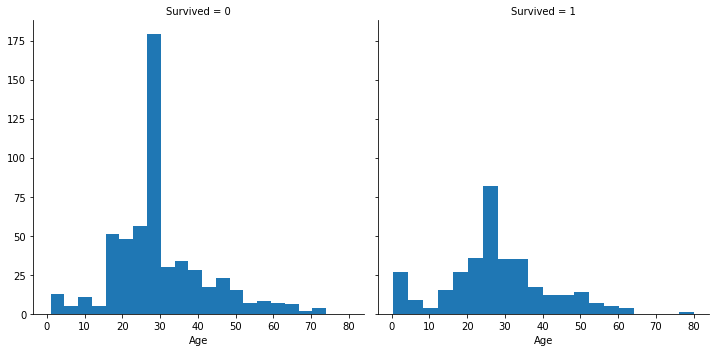

In [54]:
grid=sns.FacetGrid(titanic,col='Survived',height=5)
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

We can disregard the peak rectangle in both graphs, because we filled the NaN values for "Age" with the number 27. Additionally, we can observe that the majority of individuals who survived (right graph) were babies and infants, along with passengers between the ages of 30 and 40. The majority of individuals who did not survive (left graph) were people in their twenties and thirties.

We can explore the "Age" category additionally, by making age bands, starting from 0, going up to 80 (maximum age value from the previous histograms). Then, the age bands can be grouped for all passengers and a correlation with the "Survived" category can be established:

In [55]:
bins=[0,16,32,48,64,80]
titanic['AgeBand']=pd.cut(titanic['Age'],bins,right=True)
ageband=titanic[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)
ageband

,AgeBand,Survived
0,"(0, 16]",0.550000
1,"(16, 32]",0.344168
2,"(32, 48]",0.404255
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


<AxesSubplot:xlabel='AgeBand', ylabel='Survived'>

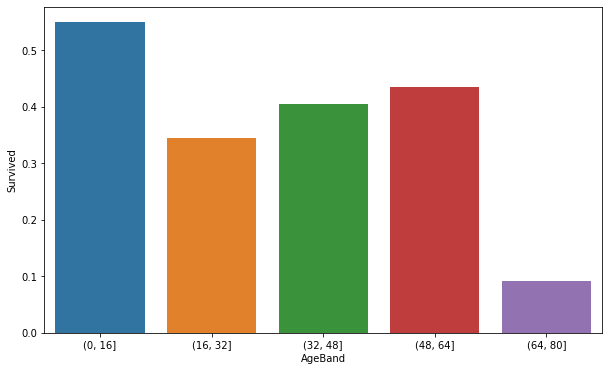

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='AgeBand',y='Survived',data=ageband)

As it can clearly be seen from the table and bar graph above, the best survival rate, in terms of age, was achieved by the age band of 0 to 16, which includes babies, infants and teenagers. The worst survival rate is observed on the last age band (elderly), between the ages of 64 and 80.

The survival rate can also be calculated for the "Embarked" column, in order to reveal which was the port of entry for which most of the passengers on board of the Titanic survived:

In [57]:
titanic.groupby('Embarked').sum()['Survived']/titanic.groupby('Embarked').count()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

From the table above, we can observe that the port of entry in the ship which showed the highest survival rate was the "C" port, whereas the one that showed the worst survival rate was the "S" port.

Now, we can construct graphs that visually represent the tables shown above, in order to answer the first question:

<AxesSubplot:xlabel='Survived', ylabel='count'>

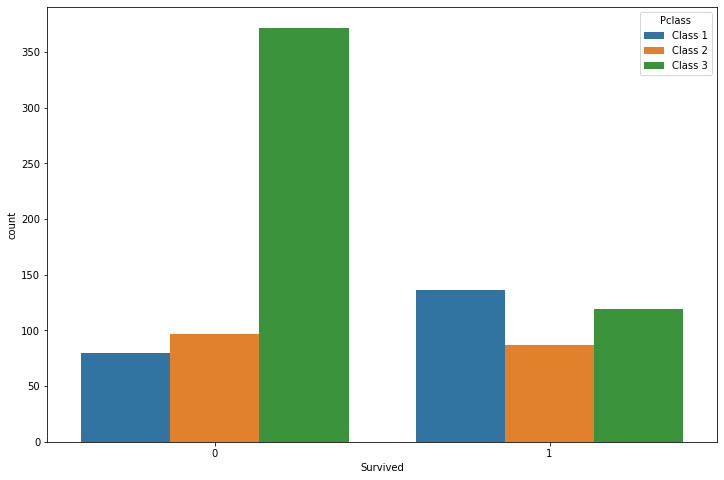

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived',data=titanic,hue='Pclass')

We can see the same pattern discussed before regarding classes in the ship. A considerable amount of people from Class 1 survived in comparison with the amount of passengers from the same class that perished. In Class 2, fewer people survived than in Class 1, and more died. In Class 3, this trend also happens, but with more intensity. Only a few more than one hundred survived, whereas more than 350 perished.

<AxesSubplot:xlabel='Survived', ylabel='count'>

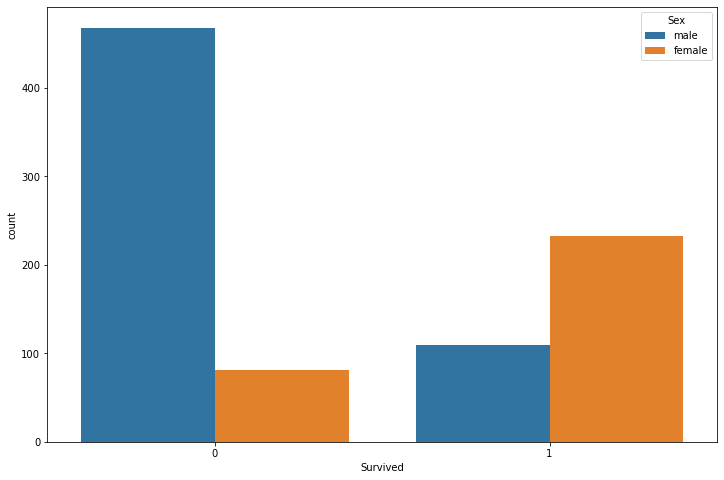

In [59]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived',data=titanic,hue='Sex')

It can be seen in the plot above that many more women survived than men, even though the total number of women on board was lower than the total number of men.

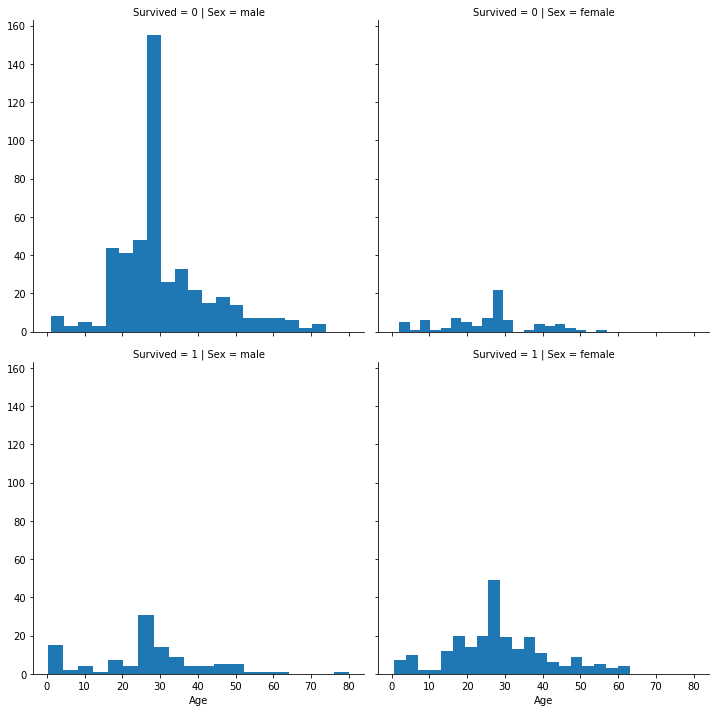

In [60]:
grid=sns.FacetGrid(titanic,row='Survived',col='Sex',height=5)
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

Observing the histograms above, we can say that, among females, the main age distribution of those who survived was between 15 and 30, whereas, for the men, this age distribution was between 0 and 10 and 20 and 30.

Additionally, we can use the crosstab() method to organize a table with the age bands created before in this analysis as the index and the gender of the passengers as the columns, in order to find the survival rate among the genders and the age bands:

In [61]:
by_gender=pd.crosstab(index=titanic['AgeBand'],columns=titanic['Sex'],values=titanic['Survived'],aggfunc='mean')
by_gender

Sex,female,male
AgeBand,,
"(0, 16]",0.673469,0.431373
"(16, 32]",0.716763,0.160000
"(32, 48]",0.794118,0.183333
"(48, 64]",0.916667,0.177778
"(64, 80]",NaN,0.090909


Text(0, 0.5, 'Survival rate')

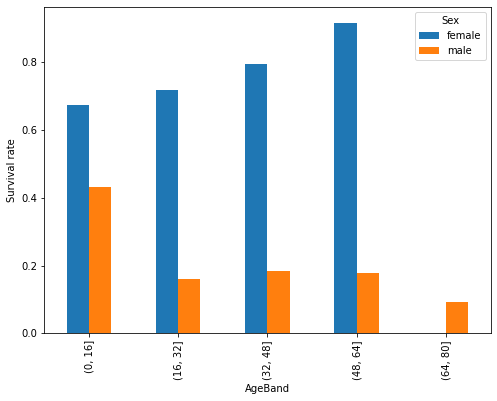

In [62]:
by_gender[['female','male']].plot(kind='bar',figsize=(8,6))
plt.ylabel('Survival rate')

By observing the table and the bar graph above, we can conclude that the best survival rates, among women, was in the age band of 48 to 64 years of age, whereas, for the men, this value is in the age band of 0 to 16. The age band between 64 and 80 returned a null value for females because there was no woman listed in the dataset who belonged to this age category.

A similar method can be utilized to find the survival rates in terms of age band and class on the ship:

In [63]:
by_class=pd.crosstab(index=titanic['AgeBand'],columns=titanic['Pclass'],values=titanic['Survived'],aggfunc='mean')
by_class

Pclass,Class 1,Class 2,Class 3
AgeBand,,,
"(0, 16]",0.888889,0.904762,0.400000
"(16, 32]",0.640449,0.421053,0.244838
"(32, 48]",0.681159,0.448980,0.100000
"(48, 64]",0.534884,0.352941,0.111111
"(64, 80]",0.166667,0.000000,0.000000


Text(0, 0.5, 'Survival rate')

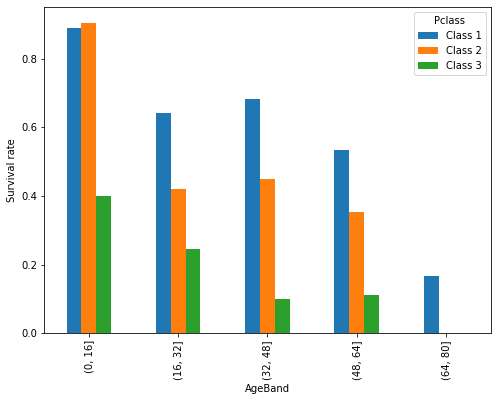

In [64]:
by_class[['Class 1','Class 2','Class 3']].plot(kind='bar',figsize=(8,6))
plt.ylabel('Survival rate')

From the table and the graph above, it can be observed that, for first class, the best survival rate was among infants, children and teenagers, while the worst was among the elderly (64-80 age band). This trend also occurs for the second and third classes.

Family size can also be included in this crosstab() method in terms of survival rate:

In [65]:
by_fam_size=pd.crosstab(index=titanic['AgeBand'],columns=titanic['Family'],values=titanic['Survived'],aggfunc='mean')
by_fam_size

Family,0,1,2,3,4,5,6,7,10
AgeBand,,,,,,,,,
"(0, 16]",0.500000,0.866667,0.807692,0.916667,0.00,0.00,0.250000,0.0,NaN
"(16, 32]",0.291209,0.494118,0.488372,0.454545,0.25,0.75,1.000000,NaN,0.0
"(32, 48]",0.336449,0.500000,0.541667,0.833333,0.00,0.00,0.333333,0.0,NaN
"(48, 64]",0.292683,0.722222,0.500000,NaN,1.00,0.00,NaN,NaN,NaN
"(64, 80]",0.111111,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Survival rate')

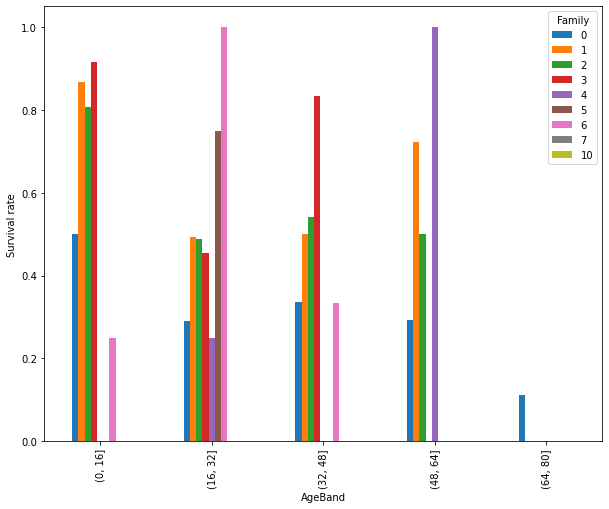

In [66]:
by_fam_size[[0,1,2,3,4,5,6,7,10]].plot(kind='bar',figsize=(10,8))
plt.ylabel('Survival rate')

The table and graph above show that the best survival rate is observed among people from the 16-32 age band, with 6 being their total family size (including children, spouse, siblings and parents), and also among people from the 48-64 age band, with a family size of 4. The worst survival rate is seen among the elderly (64 to 80 years of age), with a total family size of 1 and 2. The missing values represent absence of data in those regions of family size and age band.

For the "Embarked" feature:

<AxesSubplot:xlabel='Survived', ylabel='count'>

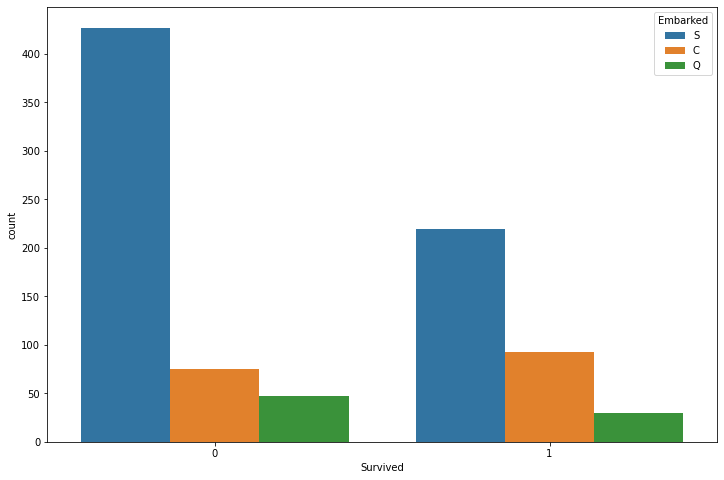

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived',data=titanic,hue='Embarked')

Among the ports of entry in the ship, the category "S" has the worst survival rate, since only a little over 200 people from this type of port of entry survived, compared to more than 400 who persihed. The port location "C" showed the greatest chances of survival, since more than 80 people survived and less than 80 persished, which represents a survival rate of more than 50%.

In [68]:
# ANSWER TO QUESTION NUMBER 1:

The people who were most likely to survive the Titanic disaster were people from Class 1, females, babies, infants and passengers between the ages of 20 and 30 and in the range of 0-16, along with passengers who were not alone on the ship (accompanied by family members). In terms of gender, the highest survival rate was observed among females. When it comes to class, the highest survival rate was seen among passengers from Class 1. 
It is only logical that the highest survival rate was observed among people from Class 1, since the location of their cabins in the ship was higher than the location of the cabins in Class 2 and Class 3. Hence, it was easier for people from Class 1 to escape the flooding vessel and reach the lifeboats. Babies, infants and females showed a higher survival rate than men because they are usually saved first in a crisis situation. Therefore, females who belonged in Class 1 showed a much higher survival rate than men from Class 3. Despite the fact that there were a lot of missing values in the age category, the highest survival rate was observed in young passengers, which makes sense, since they usually show better mobility and sharper senses to deal with emergency and high-pressure situations. Among the "Embarked" feature, the highest survival rate was observed among the passengers who embarked the ship through the "C" port, whereas the worst survival rate was observed for the "S" port of entry.
A higher survival rate was observed among people who were accompanied by at least one person, while the people who were alone on the ship were less likely to survive. Finally, the highest survival rates, in terms of cabin location on the ship, were observed on the B, D and E levels, whereas the worst are on the A, G and T levels.

In [69]:
# ANSWER TO QUESTION NUMBER 2:

The main attributes used in the analysis of the Titanic dataframe were: age, class, family size, gender (or sex), cabin, the "survived" attribute, fare and embarked features.
Despite missing some values, the "Age" category was important for the analysis, because it revealed the mean age of the passengers who survived the Titanic tragedy, even before the adjustment of filling the missing values with a center value for the age. It also revealed the age distribution of the passengers who survived and the ones who did not. Histograms were constructed to reveal the information mentioned above.
Class was also a very important attribute in the analysis, since it showed a trend that passengers who bought tickets for first class had a much better survival rate than the ones who were in third class, due to the location of the respective cabins in the ship. The dataframe was grouped by class, and ratios of passengers who survived the accident to the total number of passengers for each class were calculated in order to determine the survival rate of each class in the ship. Additionally, countplots with seaborn were constructed to visually represent the survival rates for the classes.
Family size was a new attribute used in the analysis. It involved the sum of the categories "Parch" and "SibSp", in order to reveal the quantity of family members that each passenger had on board of the Titanic. A new column was contructed in the Titanic dataframe, called "Family", in order to show the total number of family members per passenger. Its importance lies on the fact that the best survival rates were found to belong to small families, ideally three members (probably parents and a child). The worst survival rates were found to be among the big families (10 members), since these were probably in third class, whereas the small families were probably distributed in the first and second classes.
Gender or sex was equally important, because it revealed that the best survival rates lied among women, and the worst ones among men, probably due to human nature in face of disasters: women and children are usually saved first. Ratios between the number of women who survived the Titanic tragedy and the total number of women present in the ship (this was also done for the men) were calculated, as well as smaller dataframes using the "groupby" method with respect to gender were constructed. To visually represent what the dataframe showed, histograms were built comparing gender and survival rate.
The cabin attribute was first transformed, in order to reveal the general location in the ship, so the numbers after the first letters were removed. Nevertheless, there were a lot of missing values in the "Cabin" category, so its relevance was not as much as the relevance of the other attributes mentioned in this analysis.
Finally, the obvious "Survived" attribute was used, in order to determine the survival rate of the passengers in the other attributes aforementioned. Since this was a dummy variable (0 for absence or death and 1 for presence or survival), it was considerably easy to work with this attribute, especially to add the number of passengers who survived and the ones who died in the tragedy and then construct all the tables seen in the analysis. Additionally, this attribute made the construction of the histograms possible, always separating into at least two graphs: one where "Survived" was equal to 0 and another where "Survived" was equal to 1.
The "Fare" attribute showed high dispersion and some outliers, since there was the presence of a small group of people who paid considerably more than the majority of the passengers on board of the Titanic. A box plot was constructed in order to visualize the outliers and a table was constructed to find out who paid such high fares.
The "IsAlone" and "AgeBand" categories showed valuable information in terms of survival rate. The pd.cut() method was used to separate the passengers among age bins, while the "IsAlone" variable was constructed by analyzing whether the "Family" category was 0 or different than 0. The crosstab() method was used to make pivot tables of different categories (class, family size and gender) with the age bands when it comes to survival rate.

In [70]:
# ANSWER TO QUESTION NUMBER 3:

Three attributes were created in the Titanic data frame. The "Family" category combined the variables "Parch" and "SibSp", which can be used to indicate the total number of family members that a passenger brought to the Titanic, including siblings, parents, children and spouses. This helped tremendously in the analysis of survival rate in terms of family size and reduced the size of the analysis, since analyzing parents and children and then siblings and spouses would be more time consuming and rather pointless, because we cannot know for sure if a certain figure in the "Parch" category represents a determinate amount of children or parents. 
The "IsAlone" category was created with the purpose of dividing the passengers in two groups: the ones who were alone on the Titanic and the ones who were not. This allowed a more broad analysis on the survival rate.
The "AgeBand" feature was created with the purpose of grouping the passengers in terms of age bins, and to establish a correlation with the "Survived" feature.
Some attributes were excluded from the analysis. They were the passenger ID and the ticket number. The reason why "PassengerID" was excluded from the data frame is because it is just a number assigned to each passenger, much like a serial variable in SQL, so it is nothing more than an arbitrary identifier. The reason why "Ticket" was also excluded is because it showed 681 unique values, while the count in the column was 891. The number of unique tickets was not close to the number of passengers, and the ticket numbers did not appear to follow any pattern we could use for grouping people in different categories, it just represented their ticket number that they bought in order to board the Titanic.

In [71]:
# ANSWER TO QUESTION NUMBER 4:

There were two main categories with missing values: "Cabin" and "Age". The variable "Cabin" was modified in order to show only the letter and not the numbers, because the primary focus is the general location of the cabins of the passengers in the ship, and not the specific number of each cabin. There were a lot of missing values in the "Cabin" category, but this variable was not excluded from the data frame, because a passenger with his or her cabin missing could mean that he or she died; after all, how would we know what cabin a passenger stayed in if they were not around to tell the tale?
The "Age" category also contained a number of missing values, but it was not excluded from the Titanic data frame, since total deletion of this category would implicate in a significant loss of data. Instead, a histogram was contructed in order to discover what was the mean age of the passengers, which stayed between 20 and 30. A mean value of 27 was chosen and then the missing values in the "Age" category were filled with this central value, since a value of zero was not possible in this case.
In addition to the categories "Age" and "Cabin", the column "Embarked" also showed two missing values. Since the amount of missing values in this category was considerably low, they were replaced by the mode or most common value in the column, which was port of entry "S". The mode was chosen because it is a good central measurement to be used for nominal variables.